### Multiple Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the data
data = pd.read_csv('/DataScienceNotes/Assignments/07-MLR/ToyotaCorolla - MLR.csv')
data.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [3]:
# get the data information of data type and null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [4]:
# check for missing values
data.isna().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [5]:
# check the file rows and column
data.shape

(1436, 11)

In [6]:
# Identifying the numerical column and,
# check the min, max, standerd diviation, mean and quaterly values 
data.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [7]:
# make a copy of file and start manipulating by checking duplicates and null values by keeping OG file
car = data.copy()

In [8]:
# make Fuel_Type column as category data type
car['Fuel_Type']= car['Fuel_Type'].astype('category')
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Price      1436 non-null   int64   
 1   Age_08_04  1436 non-null   int64   
 2   KM         1436 non-null   int64   
 3   Fuel_Type  1436 non-null   category
 4   HP         1436 non-null   int64   
 5   Automatic  1436 non-null   int64   
 6   cc         1436 non-null   int64   
 7   Doors      1436 non-null   int64   
 8   Cylinders  1436 non-null   int64   
 9   Gears      1436 non-null   int64   
 10  Weight     1436 non-null   int64   
dtypes: category(1), int64(10)
memory usage: 113.8 KB


In [9]:
# check for the duplicates in row
car.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1431    False
1432    False
1433    False
1434    False
1435    False
Length: 1436, dtype: bool

In [10]:
# get the duplicats
car[car.duplicated()]

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
113,24950,8,13253,Diesel,116,0,2000,5,4,5,1320


In [11]:
# remove the duplicates 
car.drop_duplicates(inplace=True)

In [12]:
# check unique values in the column 
car['Cylinders'].unique()

array([4], dtype=int64)

In [13]:
# as Cylinder is having only single value in the entiry column so remove the column
car.drop('Cylinders', axis=1, inplace=True)

In [14]:
# correct the column name
car.rename(columns={'Age_08_04':'Age'}, inplace=True)
car.columns

Index(['Price', 'Age', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc', 'Doors',
       'Gears', 'Weight'],
      dtype='object')

<Figure size 400x300 with 0 Axes>

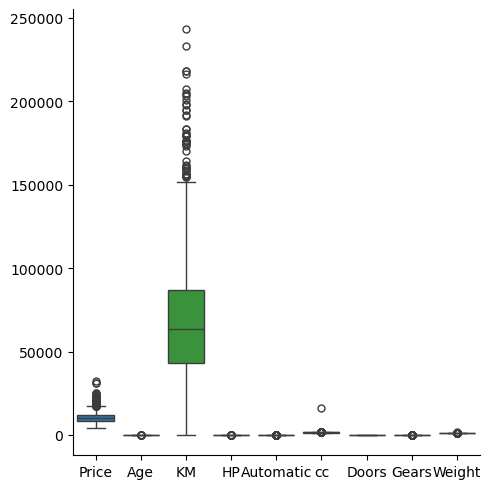

In [15]:
# finding outliers
plt.figure(figsize=(4,3))
sns.catplot(car, kind='box')
plt.show()

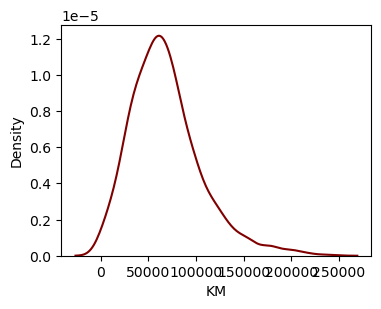

In [16]:
# check the skewness 
plt.figure(figsize=(4,3))
sns.kdeplot(car['KM'], color='maroon')
plt.show()

In [17]:
# get the KM min, max, std and mean
car['KM'].describe()

count      1435.000000
mean      68571.782578
std       37491.094553
min           1.000000
25%       43000.000000
50%       63451.000000
75%       87041.500000
max      243000.000000
Name: KM, dtype: float64

In [18]:
# calculate the Q1, Q3 and IQR for setting the upper limit and lower limit
Q1 = car['KM'].quantile(0.25)
Q3 = car['KM'].quantile(0.75)
IQR = Q3 - Q1
Q1, Q3, IQR

(43000.0, 87041.5, 44041.5)

In [19]:
# get the upper limit
upper_limit = Q3 + 1.5 * IQR
upper_limit

153103.75

In [20]:
# checking the values above the uppper limit
car[car['KM']>upper_limit]

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
186,6950,43,243000,Diesel,69,0,1900,3,5,1110
187,9500,38,180638,Diesel,90,0,2000,4,5,1160
188,11950,40,179860,Diesel,90,0,2000,5,5,1205
189,7750,43,178858,CNG,110,0,1600,3,5,1084
190,11950,40,161000,Diesel,69,0,1900,3,5,1105
191,4350,44,158320,Diesel,69,0,1800,5,5,1110
378,6500,53,216000,Diesel,69,0,1900,3,5,1110
379,6400,51,198167,Diesel,69,0,1900,4,5,1095
380,7000,53,176000,Diesel,69,0,1900,3,5,1105
381,7750,54,174139,Diesel,72,0,2000,4,5,1100


In [21]:
# set the values to the upper limit
car['KM']= np.where(car['KM']> upper_limit, upper_limit, car['KM'])

In [22]:
car[car['KM']>upper_limit]

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight


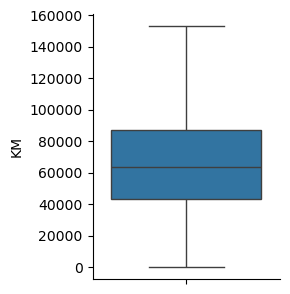

In [23]:
# cheking the outliers
sns.catplot(car['KM'], kind='box', height=3)
plt.show()

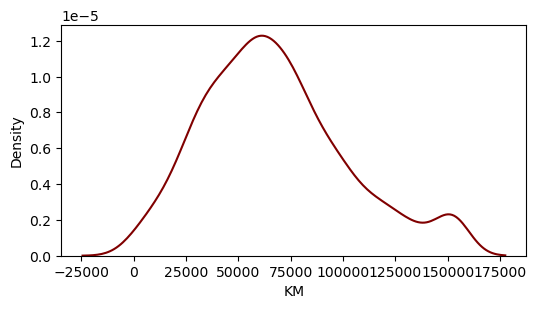

In [24]:
plt.figure(figsize=(6,3))
sns.kdeplot(car['KM'], color='maroon')
plt.show()

In [25]:
# making the fuletype column to bainary values 
car = pd.get_dummies(car, columns=['Fuel_Type'], drop_first=True)

In [26]:
# check the corelation between all the features, so to conclude the relation beteween the each features
car.corr()
# didn't find the features that musch realaated and depent on the feature

,Price,Age,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
Price,1.000000,-0.876273,-0.586871,0.314134,0.033928,0.124375,0.183604,0.063831,0.575869,0.046612,-0.031356
Age,-0.876273,1.000000,0.530947,-0.155293,0.031354,-0.096549,-0.146929,-0.005629,-0.466484,-0.093058,0.088169
KM,-0.586871,0.530947,1.000000,-0.315177,-0.082221,0.092040,-0.036618,0.019829,-0.047267,0.376921,-0.408052
HP,0.314134,-0.155293,-0.315177,1.000000,0.013313,0.035207,0.091803,0.209642,0.087143,-0.537116,0.492362
Automatic,0.033928,0.031354,-0.082221,0.013313,1.000000,0.066934,-0.027492,-0.098582,0.058499,-0.084248,0.079997
cc,0.124375,-0.096549,0.092040,0.035207,0.066934,1.000000,0.079254,0.014732,0.335077,0.326780,-0.314200
Doors,0.183604,-0.146929,-0.036618,0.091803,-0.027492,0.079254,1.000000,-0.160101,0.301734,0.023538,-0.025746
Gears,0.063831,-0.005629,0.019829,0.209642,-0.098582,0.014732,-0.160101,1.000000,0.021238,-0.048706,0.063079
Weight,0.575869,-0.466484,-0.047267,0.087143,0.058499,0.335077,0.301734,0.021238,1.000000,0.564649,-0.557315
Fuel_Type_Diesel,0.046612,-0.093058,0.376921,-0.537116,-0.084248,0.326780,0.023538,-0.048706,0.564649,1.000000,-0.942673


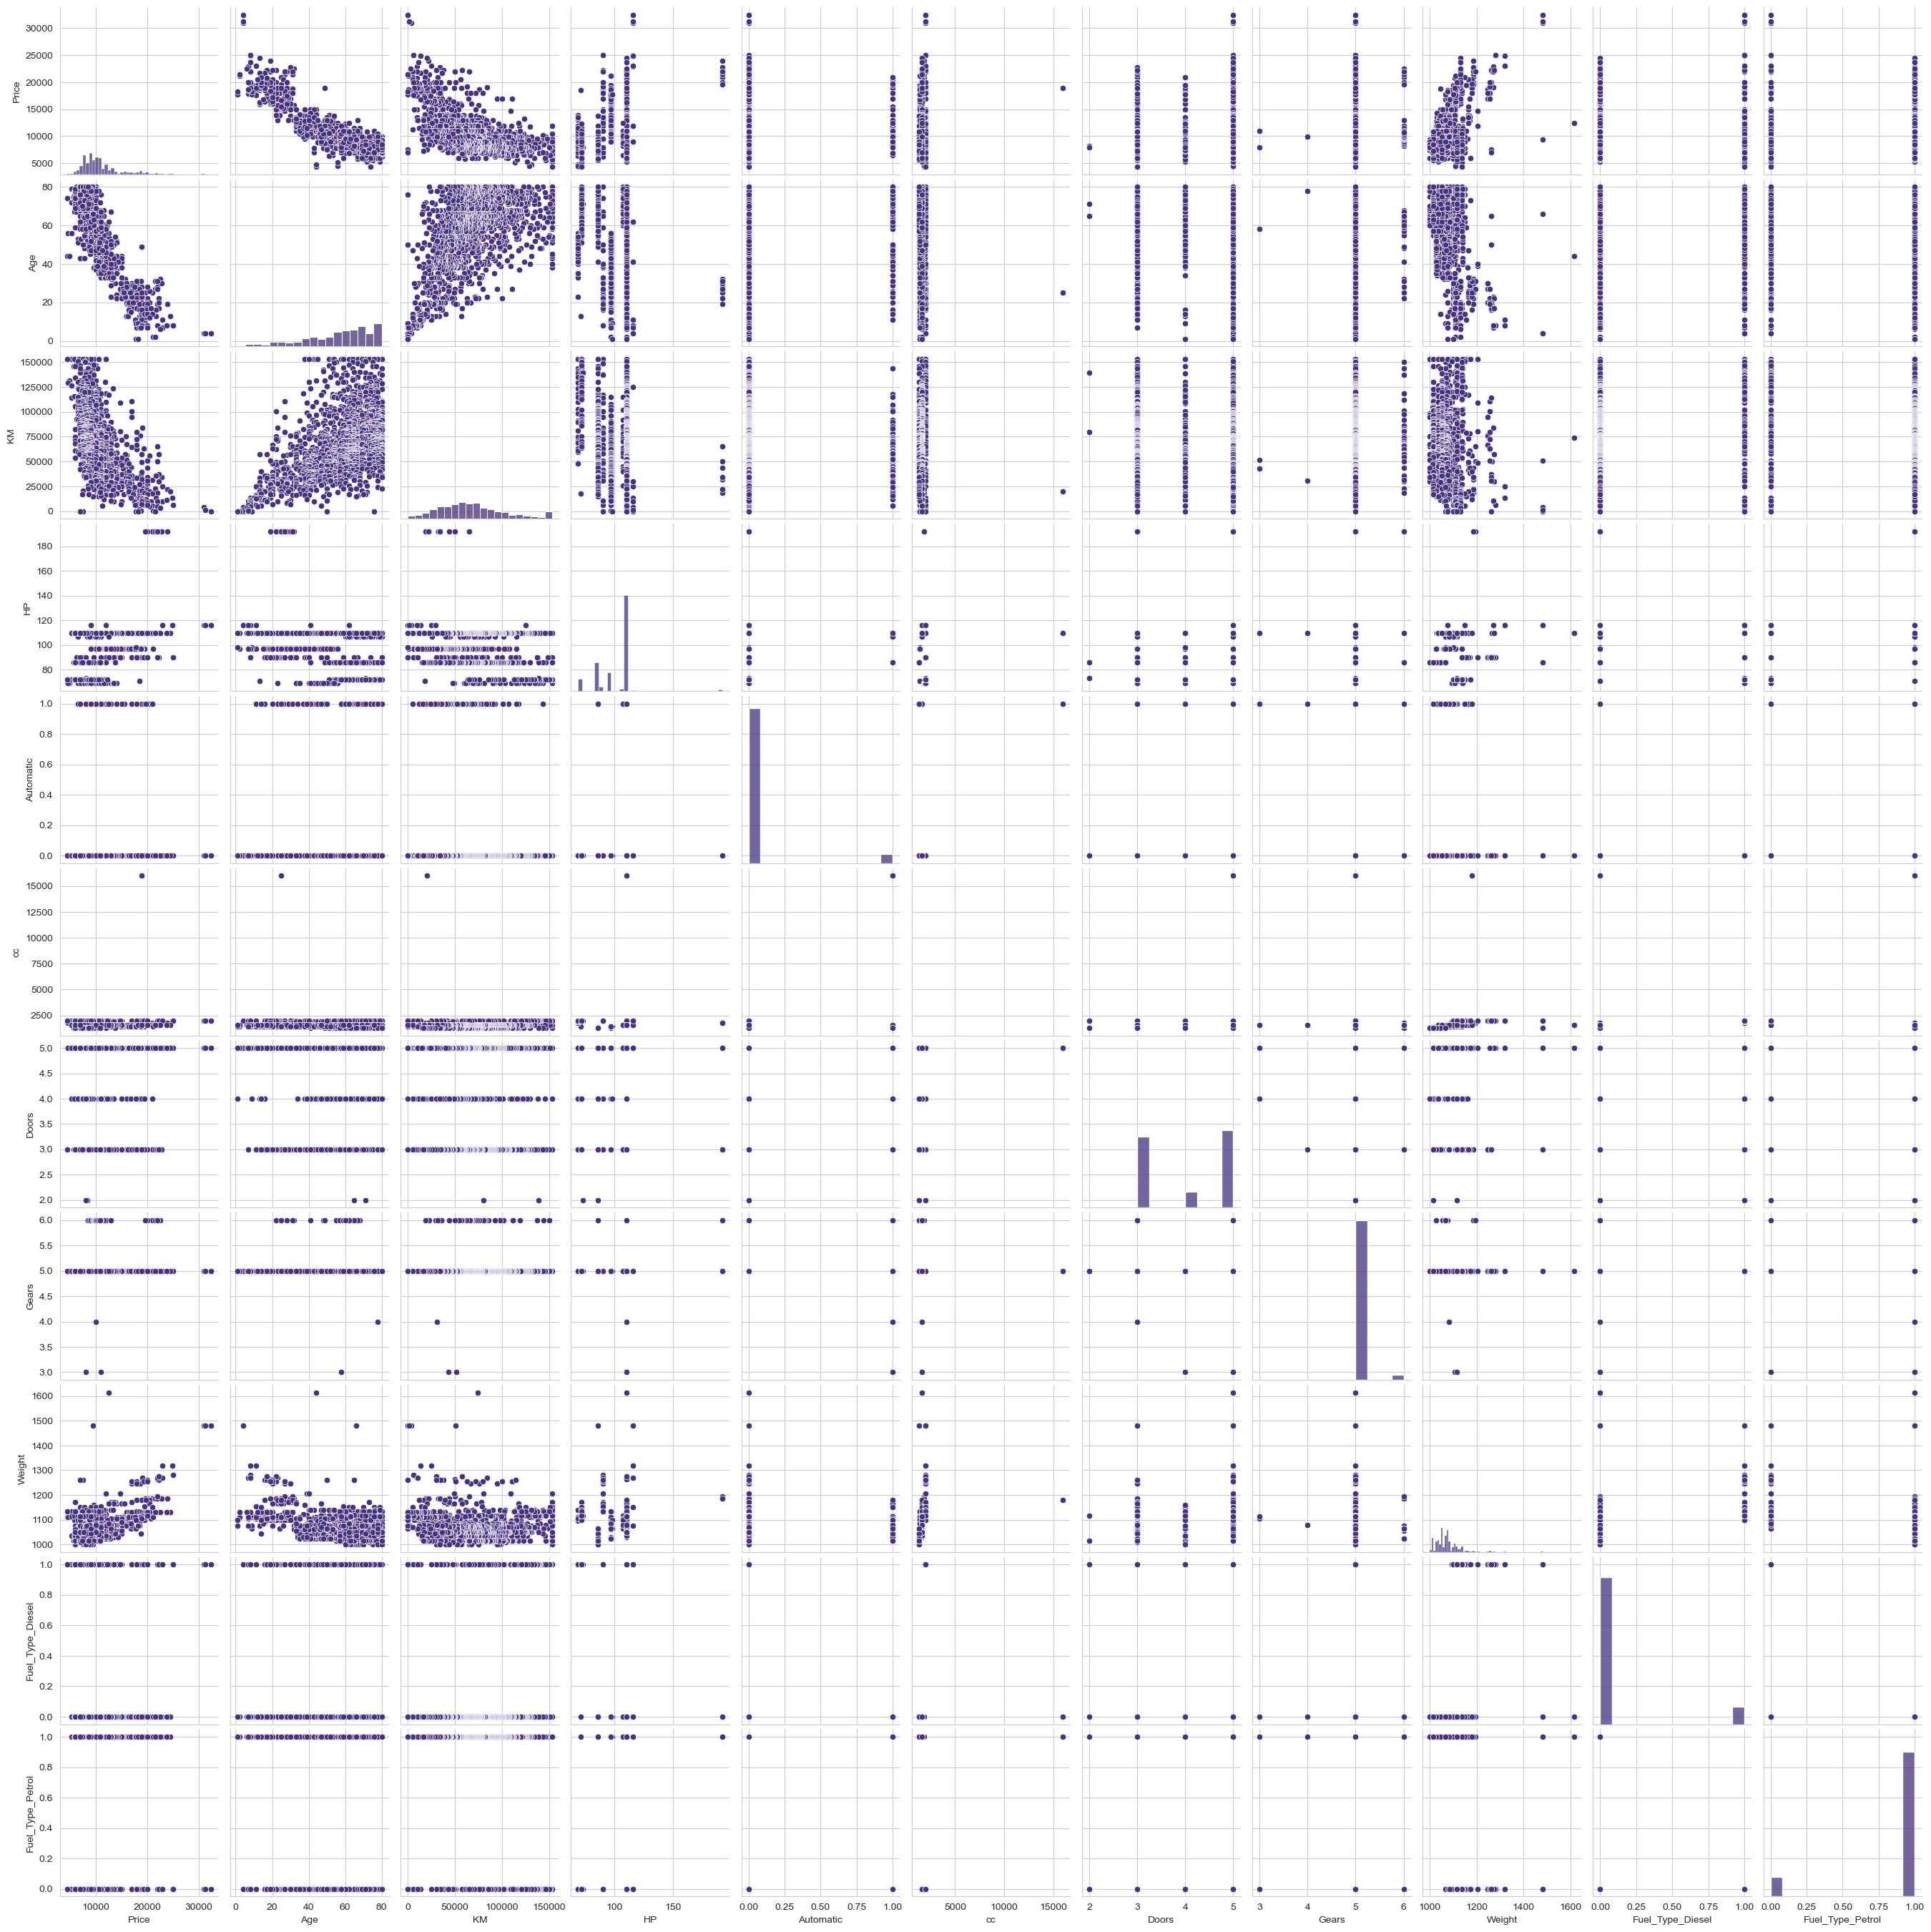

In [27]:
# checking the relations using the scatter plot
sns.set_palette('viridis')
sns.set_style(style='whitegrid')
sns.pairplot(car)

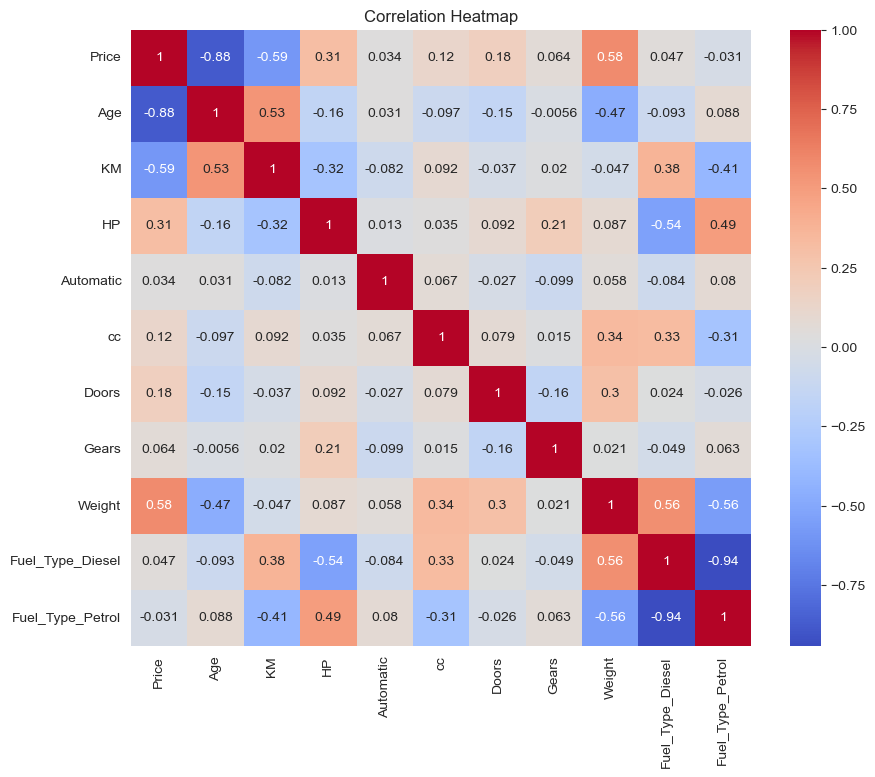

In [28]:
# a clear vision of co-relation of the features using the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(car.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

#### Preparing Models

In [29]:
# using OLS
import statsmodels.formula.api as smf
model = smf.ols('Price~Age+KM+HP+Automatic+cc+Doors+Gears+Weight+Fuel_Type_Diesel+Fuel_Type_Petrol', data=car).fit()

In [30]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     895.7
Date:                Tue, 30 Dec 2025   Prob (F-statistic):               0.00
Time:                        12:48:32   Log-Likelihood:                -12365.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1424   BIC:                         2.481e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -9884.3150   1534.097     -6.443      0.000   -1.29e+04   -6874.983
Age               -123.4063      2.679    -46.065      0.000    -128.661    -118.151
KM                  -0.0183      0.001    -12.648      0.000      -0.021      -0.015
HP                  23.6244      3.586      6.587      0.000      16.589      30.659
Automatic          298.3172    161.493      1.847      0.065     -18.472     615.107
cc                  -0.0560      0.092     -0.607      0.544      -0.237       0.125
Doors              -29.8737     41.025     -0.728      0.467    -110.350      50.602
Gears              628.8120    198.605      3.166      0.002     239.223    1018.401
Weight              20.7864      1.223     17.002      0.000      18.388      23.185
Fuel_Type_Diesel   494.3205    383.799      1.288      0.198    -258.552    1247.193
Fuel_Type_Petrol  1184.0606    339.361      3.489      0.000     518.359    1849.762
==============================================================================
Omnibus:                      257.678   Durbin-Watson:                   1.603
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2614.672
Skew:                          -0.515   Prob(JB):                         0.00
Kurtosis:                       9.532   Cond. No.                     3.31e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.31e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### chosen this Ridge regression model where the MLR will almost give the same as OLS model and the Lasso model where it will 
### drop some feature and that we didn't reqiure in this so we droped those model to build and going with the Ridge model.

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

In [32]:
# seprate features and target variable
X = car.iloc[:,1:]
y = car.iloc[:,0]

In [33]:
# scaling using standardizing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [34]:
# hoping that the model will give the same accurcy on FULL MLR,
# so building model using Ridge Regression
# first make split of data as train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1148, 10), (287, 10), (1148,), (287,))

In [35]:
# build the model
rdg_model = Ridge(alpha=1.0)

# Train the model
rdg_model.fit(X_train, y_train)

Ridge()

#### Model evaluation

In [36]:
from sklearn.metrics import mean_squared_error, r2_score

In [37]:
# train the model
yhat_train = rdg_model.predict(X_train)

In [38]:
train_mse = mean_squared_error(y_train, yhat_train)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, yhat_train)
train_mse, train_rmse, train_r2

(1727416.243434705, 1314.3120799242108, 0.8698046208019312)

In [39]:
# test the model
yhat_test = rdg_model.predict(X_test)
test_mse = mean_squared_error(y_test, yhat_test)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, yhat_test)
test_mse, test_rmse, test_r2

(2169160.1836634064, 1472.8069064420517, 0.8191934652957842)

In [40]:
# model is perfoming well on both training and testing data so the model is correct fit

##### Normalization and Standardization
##### Normalization and standardization improve model performance 
##### by scaling features to a common range, ensuring numerical stability and fair feature contribution.

##### Multicollinarity in multiple linear regression
##### Multicollinearity can be handled using variable elimination, 
##### VIF analysis, Ridge or Lasso regularization, and dimensionality reduction techniques like PCA.

### Lasso Regression

In [46]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

yhat_train = rdg_model.predict(X_train)

train_mse = mean_squared_error(y_train, yhat_train)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, yhat_train)
print(train_mse, train_rmse, train_r2)

yhat_test = lasso_model.predict(X_test)

test_mse = mean_squared_error(y_test, yhat_test)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, yhat_test)
print(test_mse, test_rmse, test_r2)


1727416.243434705 1314.3120799242108 0.8698046208019312
2171675.775160818 1473.6606716475872 0.8189837825877925


In [47]:
lasso_coeff = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso.coef_
})

lasso_coeff


,Feature,Coefficient
0,Age,-2241.601093
1,KM,-588.059326
2,HP,246.360315
3,Automatic,60.807608
4,cc,-21.521615
5,Doors,-84.214969
6,Gears,85.889500
7,Weight,1378.222070
8,Fuel_Type_Diesel,-128.061783
9,Fuel_Type_Petrol,380.896765


In [48]:
# Lasso shrinks some coeficients to zero performing feature selection